In [105]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [106]:
# Read in data
data = pd.read_csv('mnist_train.csv')

In [107]:
# Store data and split into training and dev sets  shuffle data
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

dev_data = data[0:1000].T
dev_y = dev_data[0]
dev_x = dev_data[1:n]
dev_x = dev_x / 255.

train_data = data[1000:m].T
train_y = train_data[0]
train_x = train_data[1:n]
train_x = train_x / 255.
_,m_train = train_x.shape


In [108]:
# Initialize weight and bias parameters 
# Create math activation functions layers will be applied too
# Create forward propagation function activation functions, weights and biases are applied to layers to use image data to predict image digit
# Create a backwards propagation function that uses the actual correct digit to cross check with the predictions and measures how much the weights and biases contribute to how incorrect it is 
# finally update parameters 
def init_params():
    Weight1 = np.random.rand(10, 784) - 0.5
    bias1 = np.random.rand(10, 1) - 0.5
    Weight2 = np.random.rand(10, 10) - 0.5
    bias2 = np.random.rand(10, 1) - 0.5
    return Weight1, bias1, Weight2, bias2

def ReLU(Unactivated_layer):
    return np.maximum(Unactivated_layer, 0)

def softmax(Unactivated_layer):
    return np.exp(Unactivated_layer) / sum(np.exp(Unactivated_layer))
    
def forward_propagation(Weight1, bias1, Weight2, bias2, x):
    Unactivated_layer_1 = Weight1.dot(x) + bias1
    Input_layer_1 = ReLU(Unactivated_layer_1)
    Unactivated_layer_2 = Weight2.dot(Input_layer_1) + bias2
    Input_layer_2 = softmax(Unactivated_layer_2)
    return Unactivated_layer_1, Input_layer_1, Unactivated_layer_2, Input_layer_2

def ReLU_deriv(Unactivated_layer):
    return Unactivated_layer > 0

#used to encode the label actual digits row
def digit_encode(y):
    encode_y = np.zeros((y.size, y.max() + 1))
    encode_y[np.arange(y.size), y] = 1
    encode_y = encode_y.T
    return encode_y

def backward_propagation(Unactivated_layer_1, Input_layer_1, Unactivated_layer_2, Input_layer_2, Weight1, Weight2, x, y):
    encode_y = digit_encode(y)
    dU2 = Input_layer_2 - encode_y
    dWeight2 = 1 / m * dU2.dot(Input_layer_1.T)
    dbias2 = 1 / m * np.sum(dU2)
    dU1 = Weight2.T.dot(dU2) * ReLU_deriv(Unactivated_layer_1)
    dWeight1 = 1 / m * dU1.dot(x.T)
    dbias1 = 1 / m * np.sum(dU1)
    return dWeight1, dbias1, dWeight2, dbias2

def update_params(Weight1, bias1, Weight2, bias2, dWeight1, dbias1, dWeight2, dbias2, alpha):
    Weight1 = Weight1 - alpha * dWeight1
    bias1 = bias1 - alpha * dbias1    
    Weight2 = Weight2 - alpha * dWeight2  
    bias2 = bias2 - alpha * dbias2    
    return Weight1, bias1, Weight2, bias2


In [109]:
# Put the function together as a learning model iterate through the data and get accuracy
def get_predictions(Input_layer_2):
    return np.argmax(Input_layer_2, 0)

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size

def learning_model(x, y, alpha, iterations):
    Weight1, bias1, Weight2, bias2 = init_params()
    for i in range(iterations):
        Unactivated_layer_1, Input_layer_1, Unactivated_layer_2, Input_layer_2 = forward_propagation(Weight1, bias1, Weight2, bias2, x)
        dWeight1, dbias1, dWeight2, dbias2 = backward_propagation(Unactivated_layer_1, Input_layer_1, Unactivated_layer_2, Input_layer_2, Weight1, Weight2, x, y)
        Weight1, bias1, Weight2, bias2 = update_params(Weight1, bias1, Weight2, bias2, dWeight1, dbias1, dWeight2, dbias2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(Input_layer_2)
            print("Accuracy: ", get_accuracy(predictions, y))
    return Weight1, bias1, Weight2, bias2



In [110]:
Weight1, bias1, Weight2, bias2 = learning_model(train_x, train_y, 0.10, 500)

Iteration:  0
[4 6 6 ... 7 7 8] [4 1 9 ... 2 5 3]
Accuracy:  0.08857627118644068
Iteration:  50
[4 2 4 ... 2 3 8] [4 1 9 ... 2 5 3]
Accuracy:  0.26552542372881355
Iteration:  100
[4 1 9 ... 2 3 3] [4 1 9 ... 2 5 3]
Accuracy:  0.5146440677966102
Iteration:  150
[4 1 9 ... 2 3 3] [4 1 9 ... 2 5 3]
Accuracy:  0.6391016949152543
Iteration:  200
[4 1 9 ... 2 3 3] [4 1 9 ... 2 5 3]
Accuracy:  0.7176610169491525
Iteration:  250
[4 1 9 ... 2 3 3] [4 1 9 ... 2 5 3]
Accuracy:  0.7628983050847458
Iteration:  300
[4 1 9 ... 2 3 3] [4 1 9 ... 2 5 3]
Accuracy:  0.7903559322033898
Iteration:  350
[4 1 9 ... 2 3 3] [4 1 9 ... 2 5 3]
Accuracy:  0.807677966101695
Iteration:  400
[4 1 9 ... 2 3 3] [4 1 9 ... 2 5 3]
Accuracy:  0.819728813559322
Iteration:  450
[4 1 9 ... 2 3 3] [4 1 9 ... 2 5 3]
Accuracy:  0.8285423728813559


In [111]:
# Finally make and test prediction from image data using layers weights and biases
# Display prediction and data image

def make_predictions(x, Weight1, bias1, Weight2, bias2):
    _, _, _, Input_layer_2 = forward_propagation(Weight1, bias1, Weight2, bias2, x)
    predictions = get_predictions(Input_layer_2)
    return predictions

def test_prediction(index, Weight1, bias1, Weight2, bias2):
    current_image = train_x[:, index, None]
    prediction = make_predictions(train_x[:, index, None], Weight1,bias1,Weight2,bias2)
    label = train_y[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28,28)) *255
    plt.gray()
    plt.imshow(current_image, interpolation = 'nearest')
    plt.show()

Prediction:  [9]
Label:  9


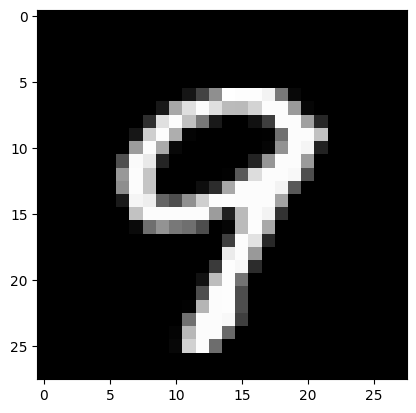

In [115]:
test_prediction(2, Weight1, bias1, Weight2, bias2)